In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# Load the dataset
data = pd.read_csv('train.csv')
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [37]:
# Display the first few rows of the dataset to understand the structure
print("Dataset Preview:")
data.head()

Dataset Preview:


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [38]:
# Check the general info about the dataset (data types, non-null counts, etc.)
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [39]:
# Show basic statistics for numerical columns
print("\nStatistical Summary (Numerical Columns):")
data.describe()


Statistical Summary (Numerical Columns):


,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [40]:
# Show basic statistics for text-based columns
print("\nStatistical Summary (Text Columns):")
data.describe(include=['object'])


Statistical Summary (Text Columns):


,title,author,text
count,20242,18843,20761
unique,19803,4201,20386
top,Get Ready For Civil Unrest: Survey Finds That ...,Pam Key,
freq,5,243,75


# Exploratory Data Analysis (EDA)

In [41]:
# Check for any missing values in the dataset
print("\nMissing Values Count:")
data.isnull().sum()


Missing Values Count:


id           0
title      558
author    1957
text        39
label        0
dtype: int64

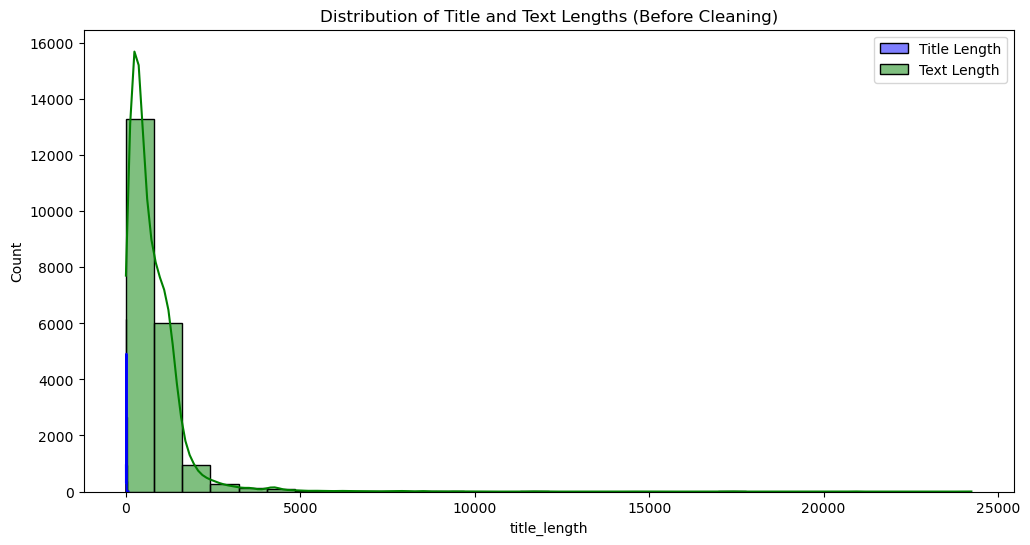

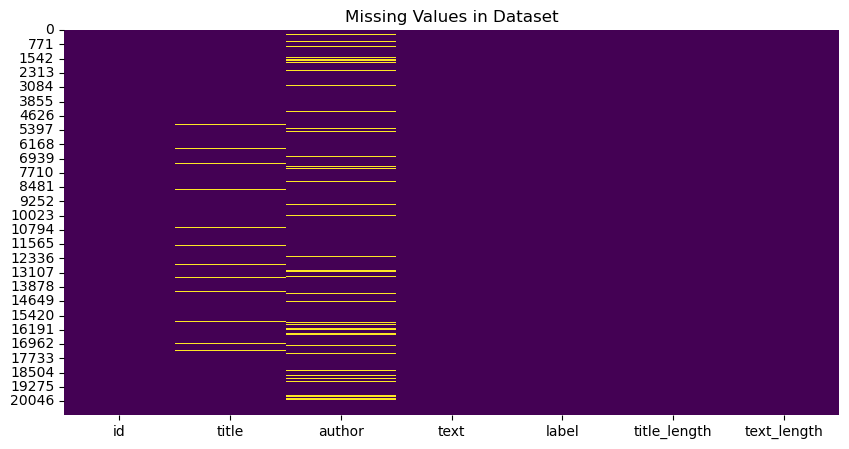

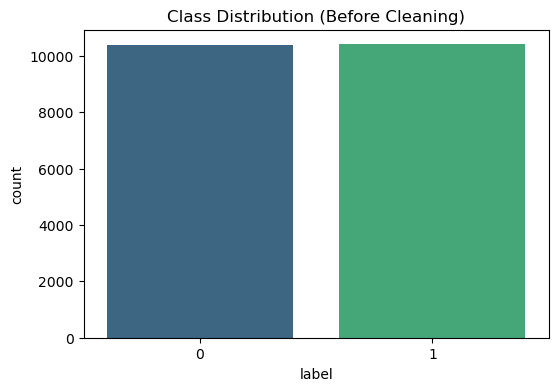

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of text lengths (before cleaning)
data['title_length'] = data['title'].apply(lambda x: len(str(x).split()))
data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(data['title_length'], bins=30, kde=True, color='blue', label='Title Length')
sns.histplot(data['text_length'], bins=30, kde=True, color='green', label='Text Length')
plt.legend()
plt.title('Distribution of Title and Text Lengths (Before Cleaning)')
plt.show()

# Missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

# Class distribution of 'label' column
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution (Before Cleaning)')
plt.show()

In [43]:
# Display rows with missing values in each column
print("Rows with Missing Values in 'title' Column:")
data[data['title'].isnull()]

Rows with Missing Values in 'title' Column:


,id,title,author,text,label,title_length,text_length
53,53,NaN,Dairy✓ᵀᴿᵁᴹᴾ,Sounds like he has our president pegged. What ...,1,1,131
120,120,NaN,Anonymous,"Same people all the time , i dont know how you...",1,1,16
124,124,NaN,SeekSearchDestory,"You know, outside of any morality arguments, i...",1,1,100
140,140,NaN,Anonymous,There is a lot more than meets the eye to this...,1,1,119
196,196,NaN,Raffie,They got the heater turned up on high.,1,1,8
...,...,...,...,...,...,...,...
20568,20568,NaN,Cathy Milne,"Amusing comment Gary! “Those week!” So, are ...",1,1,32
20627,20627,NaN,Ramona,"No she doesn’t have more money than God, every...",1,1,21
20636,20636,NaN,Dave Lowery,Trump all the way!,1,1,4
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1,1,40


In [44]:
print("\nRows with Missing Values in 'author' Column:")
data[data['author'].isnull()]


Rows with Missing Values in 'author' Column:


,id,title,author,text,label,title_length,text_length
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1,17,489
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0,19,1440
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1,23,377
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1,13,484
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1,9,1146
...,...,...,...,...,...,...,...
20718,20718,This Is The Best Picture In Human History | Da...,NaN,This Is The Best Picture In Human History By: ...,1,11,398
20728,20728,Trump warns of World War III if Clinton is ele...,NaN,Email Donald Trump warned in an interview Tues...,1,10,773
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1,13,457
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1,12,283


In [45]:
print("\nRows with Missing Values in 'text' Column:")
data[data['text'].isnull()]


Rows with Missing Values in 'text' Column:


,id,title,author,text,label,title_length,text_length
142,142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,NaN,1,18,1
573,573,Le top des recherches Google passe en top des ...,NaN,NaN,1,14,1
1200,1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,NaN,1,18,1
1911,1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,NaN,1,19,1
2148,2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1,24,1
2169,2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,NaN,1,18,1
2793,2793,«Pourquoi je suis candidat à la présidentielle...,NaN,NaN,1,19,1
3329,3329,GuinessBook : 100 millions d’Américains batten...,NaN,NaN,1,13,1
3729,3729,Les Américains ne sont plus qu’à quelques heur...,NaN,NaN,1,17,1
4288,4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,NaN,1,8,1


In [46]:
# Handling missing values in the 'title' and 'author' columns by filling with 'Unknown'
data['title'].fillna("Unknown", inplace=True)
data['author'].fillna("Unknown", inplace=True)

In [47]:
# Handling missing values in the 'text' column by filling with 'Unknown'
data['text'].fillna("Unknown", inplace=True)

In [48]:
print("Missing Values Count After Cleaning:")
data.isnull().sum()

Missing Values Count After Cleaning:


id              0
title           0
author          0
text            0
label           0
title_length    0
text_length     0
dtype: int64

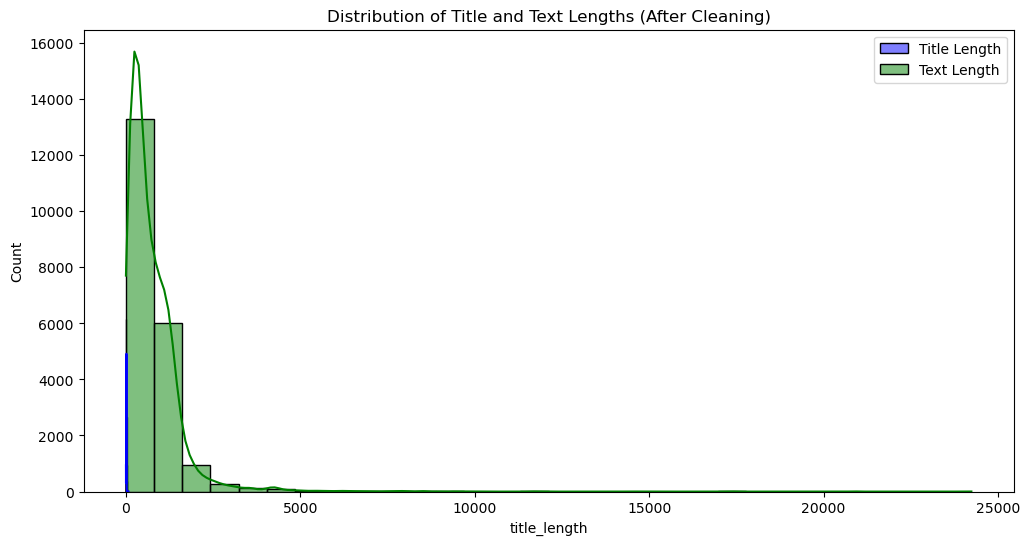

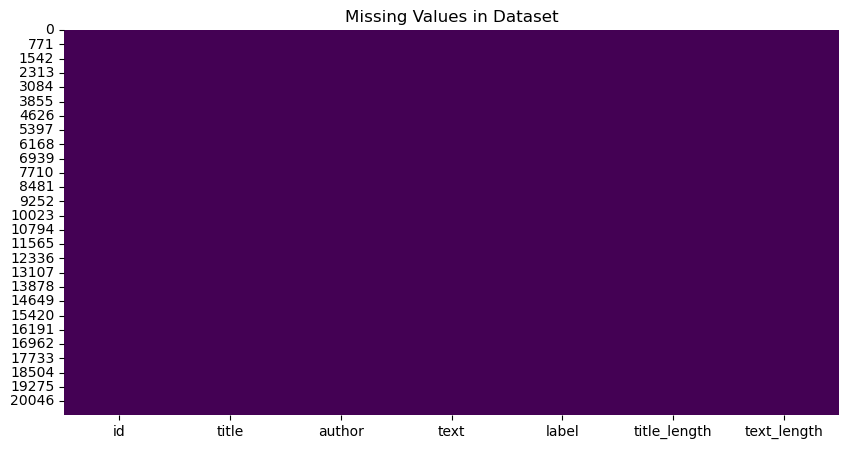

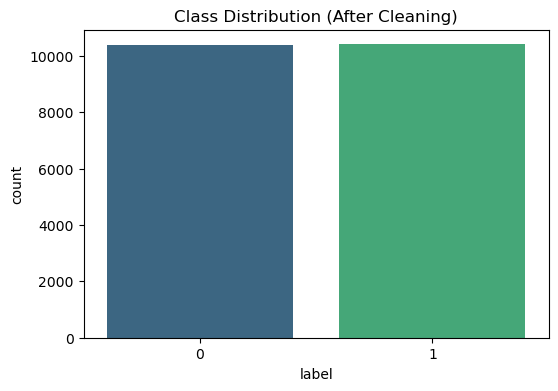

In [49]:
# Re-run text length distribution after cleaning
data['title_length'] = data['title'].apply(lambda x: len(str(x).split()))
data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(data['title_length'], bins=30, kde=True, color='blue', label='Title Length')
sns.histplot(data['text_length'], bins=30, kde=True, color='green', label='Text Length')
plt.legend()
plt.title('Distribution of Title and Text Lengths (After Cleaning)')
plt.show()

# Missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

# Check class distribution after cleaning (should remain same)
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution (After Cleaning)')
plt.show()

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords and WordNet data (only needed once)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

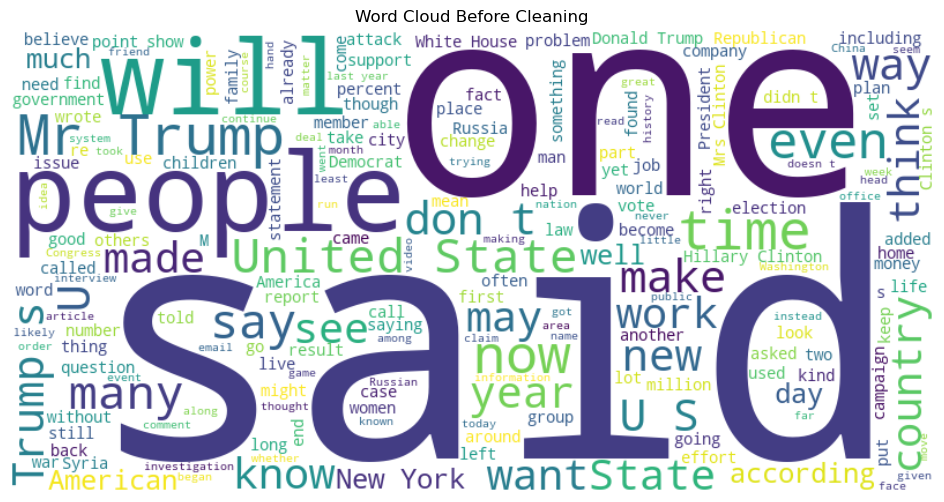

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all text data for WordCloud
original_text = " ".join(str(text) for text in data['text'])

# WordCloud before cleaning
plt.figure(figsize=(12, 6))
wordcloud_before = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(original_text)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Before Cleaning")
plt.show()

## Define a Preprocessing Function

1. Remove special characters and numbers.
2. Convert text to lowercase.
3. Remove common stop words (like "the," "and," etc.).
4. Lemmatize words (convert them to their base forms, like "running" to "run").

In [52]:
import re

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the text preprocessing function
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    return ' '.join(tokens)


## Apply Preprocessing to Data

In [53]:
# Apply preprocessing to the 'title' and 'text' columns
data['title'] = data['title'].apply(preprocess_text)
data['text'] = data['text'].apply(preprocess_text)

# Check a few rows to see the results
data[['title', 'text']].head()


,title,text
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...
2,truth might get fired,truth might get fired october tension intellig...
3,civilian killed single u airstrike identified,video civilian killed single u airstrike ident...
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...


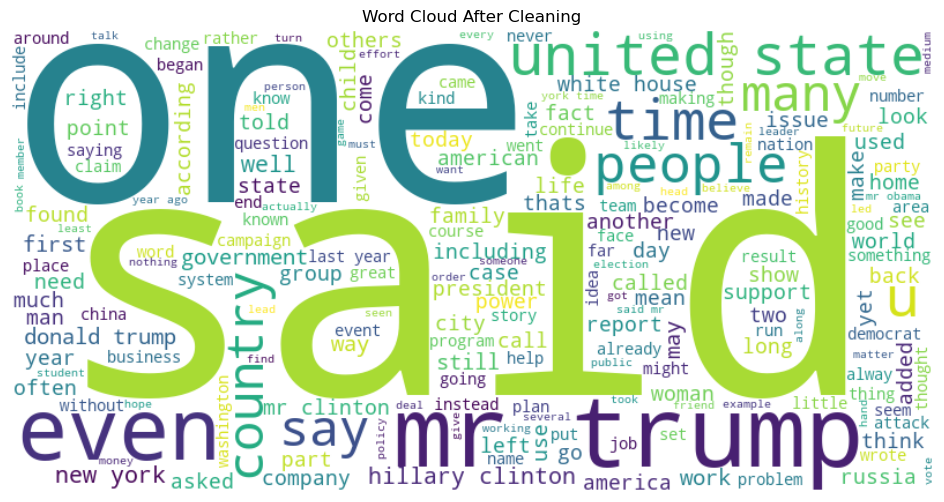

In [54]:
# WordCloud after cleaning
cleaned_text = " ".join(data['text'])
plt.figure(figsize=(12, 6))
wordcloud_after = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(cleaned_text)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud After Cleaning")
plt.show()

In [55]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stop words and lemmatizer data (run only once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words set and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the text preprocessing function
def preprocess_text(text):
    # Step 1: Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keeps only letters and whitespace
    
    # Step 2: Convert text to lowercase for uniformity
    text = text.lower()
    
    # Step 3: Tokenization and Stop Words Removal
    tokens = text.split()  # Splits text into a list of words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    
    # Step 4: Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Convert words to their root forms
    
    # Step 5: Rejoin tokens into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
# Apply preprocessing to the 'title' and 'text' columns
data['title'] = data['title'].apply(preprocess_text)
data['text'] = data['text'].apply(preprocess_text)

# Display first few rows to verify preprocessing
data[['title', 'text']].head()


,title,text
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...
2,truth might get fired,truth might get fired october tension intellig...
3,civilian killed single u airstrike identified,video civilian killed single u airstrike ident...
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...


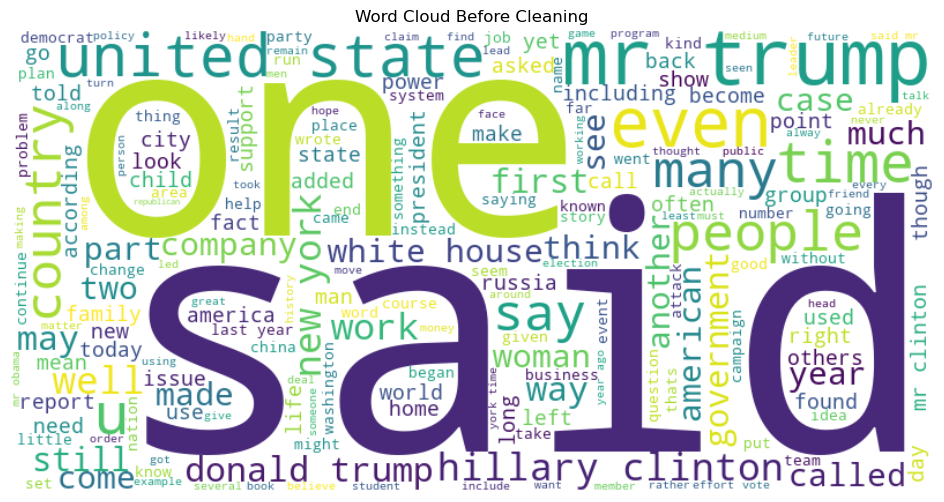

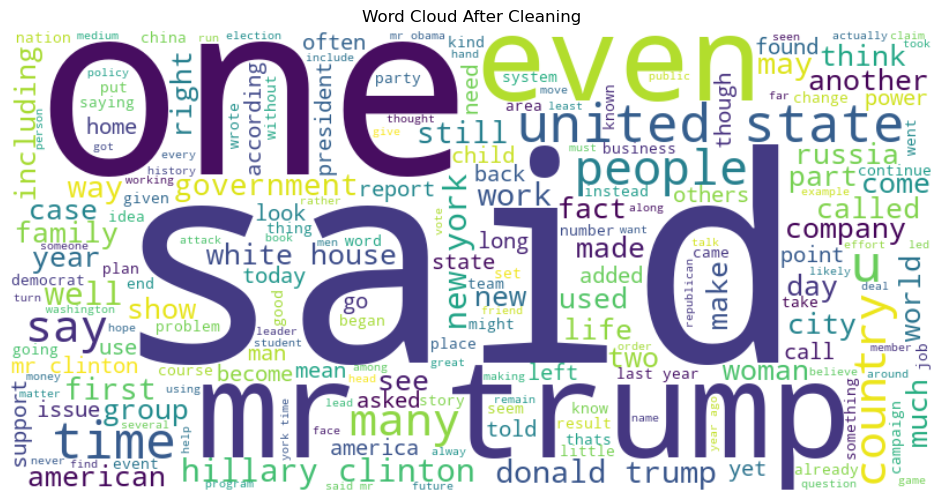

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud before cleaning
original_text = " ".join(str(text) for text in data['text'])
plt.figure(figsize=(12, 6))
wordcloud_before = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(original_text)
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Before Cleaning")
plt.show()

# WordCloud after cleaning
cleaned_text = " ".join(data['text'])
plt.figure(figsize=(12, 6))
wordcloud_after = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(cleaned_text)
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud After Cleaning")
plt.show()


## EDA Visualizations

1. Class Distribution Analysis

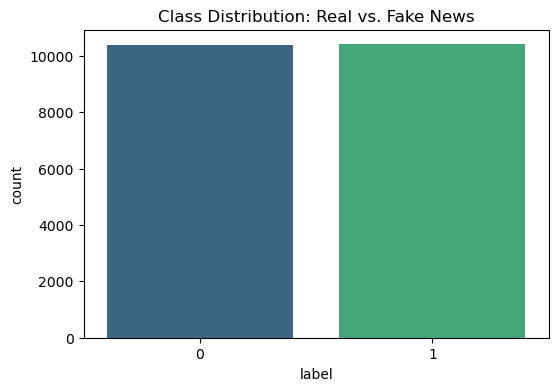

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the 'label' column
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution: Real vs. Fake News')
plt.show()

2. Word Frequency Analysis

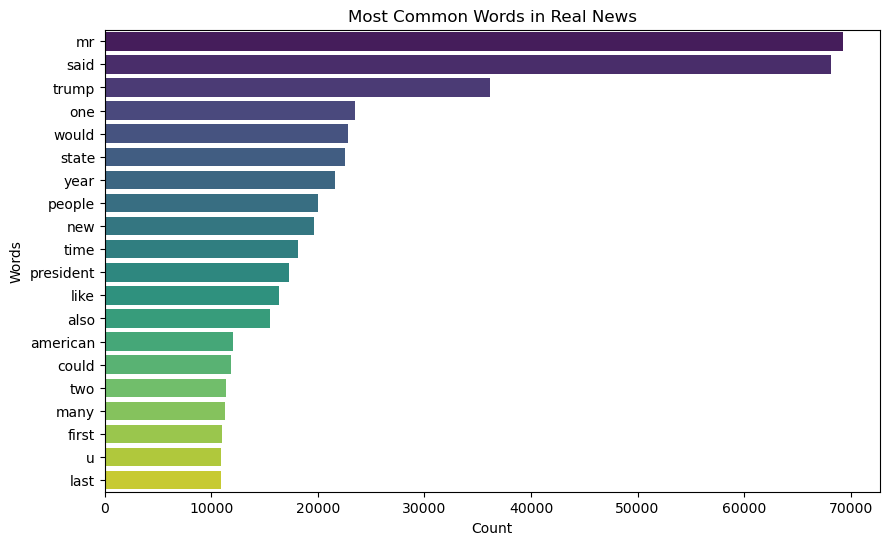

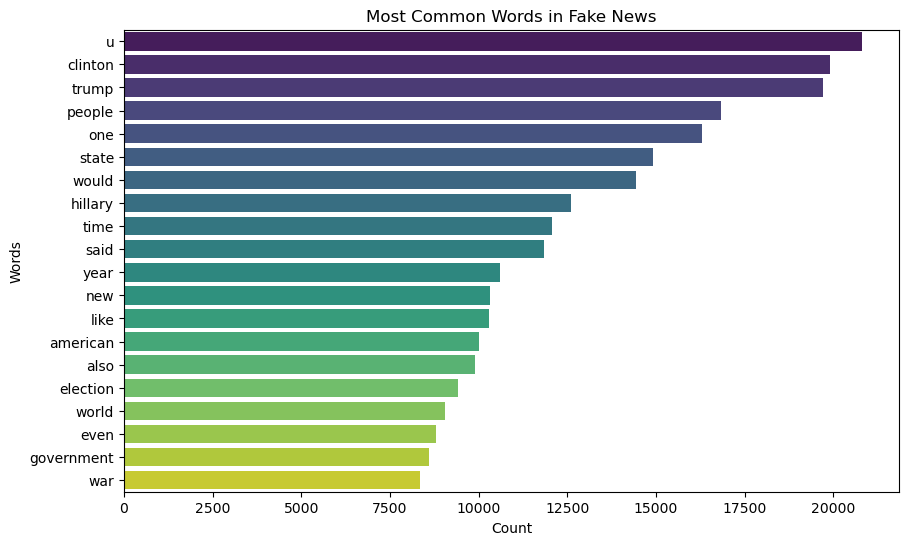

In [59]:
from collections import Counter

# Function to get the most common words in each class
def plot_most_common_words(text_data, title):
    all_words = ' '.join(text_data)
    word_counts = Counter(all_words.split())
    common_words = word_counts.most_common(20)
    
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Most Common Words in {title}')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

# Plot most common words for each class
real_news = data[data['label'] == 0]  # Assuming 0 is real news
fake_news = data[data['label'] == 1]  # Assuming 1 is fake news

plot_most_common_words(real_news['text'], 'Real News')
plot_most_common_words(fake_news['text'], 'Fake News')

3. Text Length Distribution

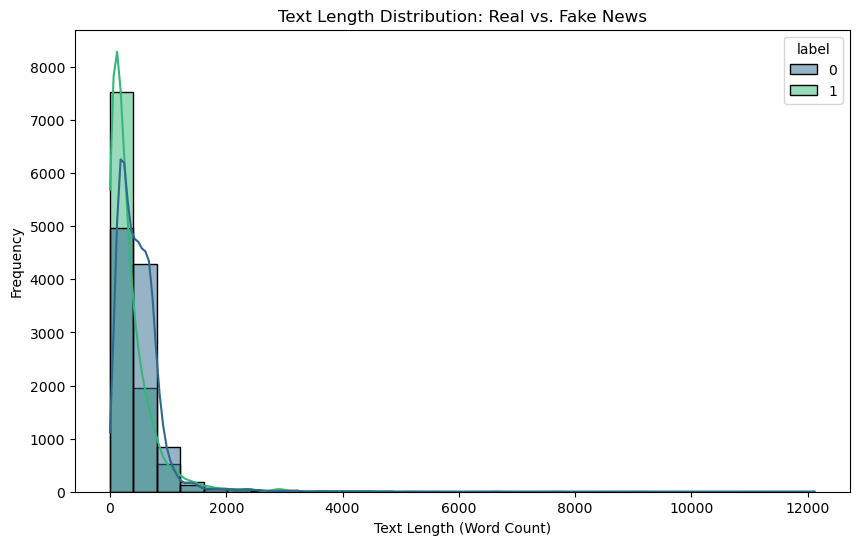

In [60]:
# Adding a new column for text length
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

# Plotting text length distribution by class
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='label', bins=30, kde=True, palette='viridis')
plt.title('Text Length Distribution: Real vs. Fake News')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Filter out rows where the word count of 'text' is greater than 2000
data = data[data['text'].apply(lambda x: len(x.split()) <= 2000)]

# Check the shape of the dataset to see if many rows were removed
print("Dataset shape after filtering:", data.shape)


Dataset shape after filtering: (20554, 7)


C:\Users\chara\AppData\Local\Temp\ipykernel_17112\1253302950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_length'] = data['text'].apply(lambda x: len(x.split()))


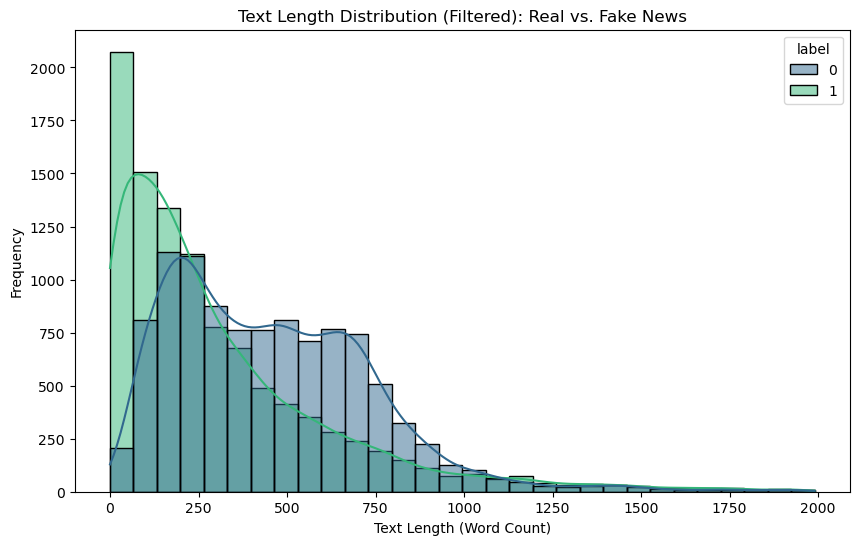

In [62]:
# Recalculate text length
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

# Plotting text length distribution by class after filtering
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='label', bins=30, kde=True, palette='viridis')
plt.title('Text Length Distribution (Filtered): Real vs. Fake News')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Frequency')
plt.show()


Converting Text to Numerical Features (TF-IDF Vectorization)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize TF-IDF Vectorizer with a max of 5000 features
# tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# # Fit and transform the text data into TF-IDF features
# X = tfidf_vectorizer.fit_transform(data['text']).toarray()  # Convert to array
# y = data['label']  # Target labels


**using tfidf making alot of complications in deployment phase so instead using countvectorizer**

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # Limit features to the top 5000 terms

# Fit and transform the text data
X = count_vectorizer.fit_transform(data['text']).toarray()

# Labels
y = data['label']


In [73]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20554, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')


Training set shape: (16443, 5000), Testing set shape: (4111, 5000)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=['Real News', 'Fake News']))


Accuracy: 0.9441
              precision    recall  f1-score   support

   Real News       0.95      0.94      0.94      2031
   Fake News       0.94      0.95      0.95      2080

    accuracy                           0.94      4111
   macro avg       0.94      0.94      0.94      4111
weighted avg       0.94      0.94      0.94      4111



Accuracy: 0.9441
              precision    recall  f1-score   support

   Real News       0.95      0.94      0.94      2031
   Fake News       0.94      0.95      0.95      2080

    accuracy                           0.94      4111
   macro avg       0.94      0.94      0.94      4111
weighted avg       0.94      0.94      0.94      4111



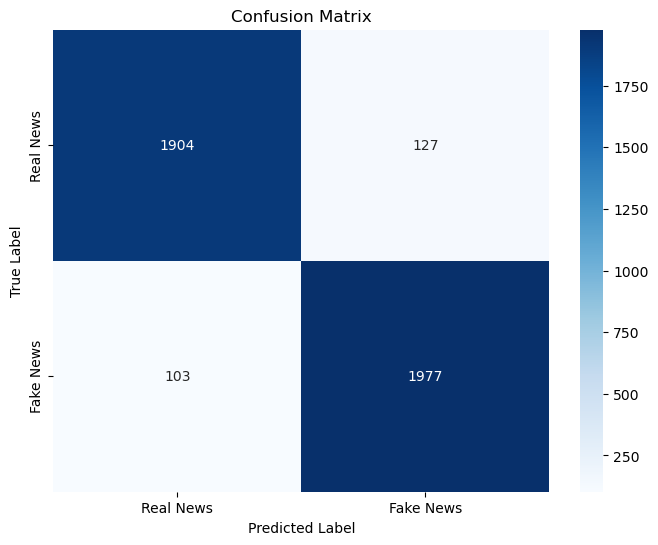

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Model Selection with Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=['Real News', 'Fake News']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.9370
              precision    recall  f1-score   support

   Real News       0.93      0.95      0.94      2031
   Fake News       0.95      0.93      0.94      2080

    accuracy                           0.94      4111
   macro avg       0.94      0.94      0.94      4111
weighted avg       0.94      0.94      0.94      4111



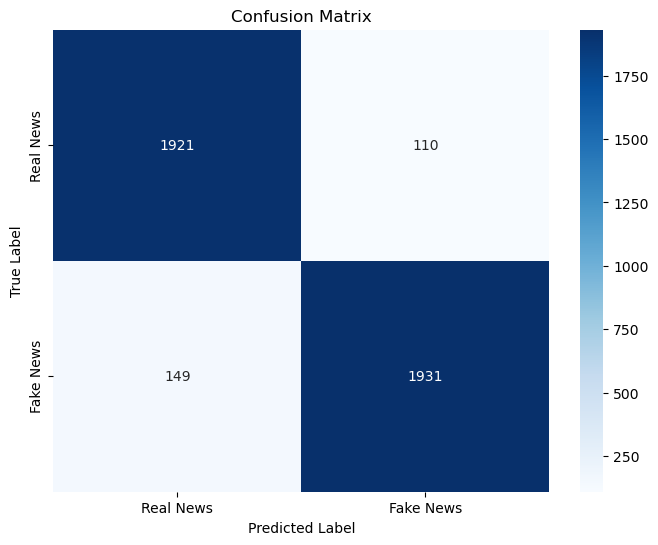

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=['Real News', 'Fake News']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.8665
              precision    recall  f1-score   support

   Real News       0.84      0.90      0.87      2031
   Fake News       0.90      0.83      0.86      2080

    accuracy                           0.87      4111
   macro avg       0.87      0.87      0.87      4111
weighted avg       0.87      0.87      0.87      4111



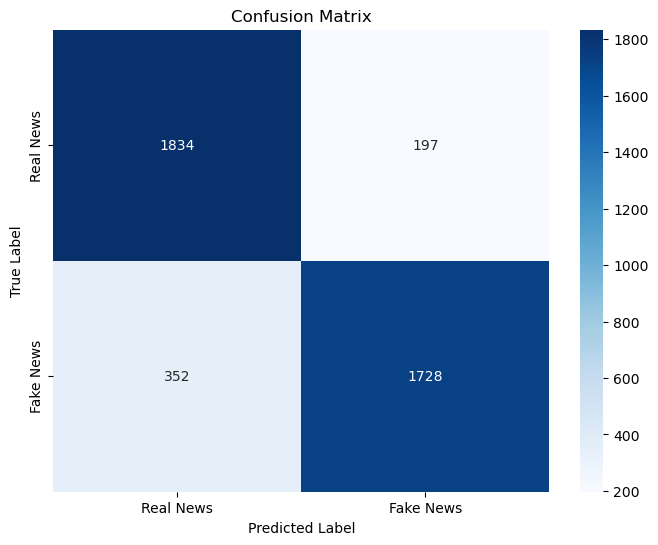

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Model Selection with Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make Predictions
y_pred = nb_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=['Real News', 'Fake News']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

C:\Users\chara\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [13:49:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9618
              precision    recall  f1-score   support

   Real News       0.97      0.95      0.96      2031
   Fake News       0.96      0.97      0.96      2080

    accuracy                           0.96      4111
   macro avg       0.96      0.96      0.96      4111
weighted avg       0.96      0.96      0.96      4111



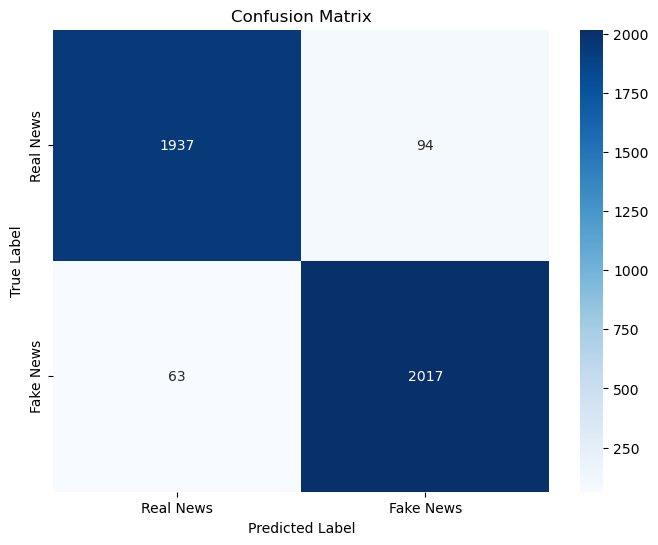

In [ ]:
from xgboost import XGBClassifier

# Model Selection with XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Use eval_metric for compatibility
xgb_model.fit(X_train, y_train)

# Make Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=['Real News', 'Fake News']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

C:\Users\chara\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [13:53:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


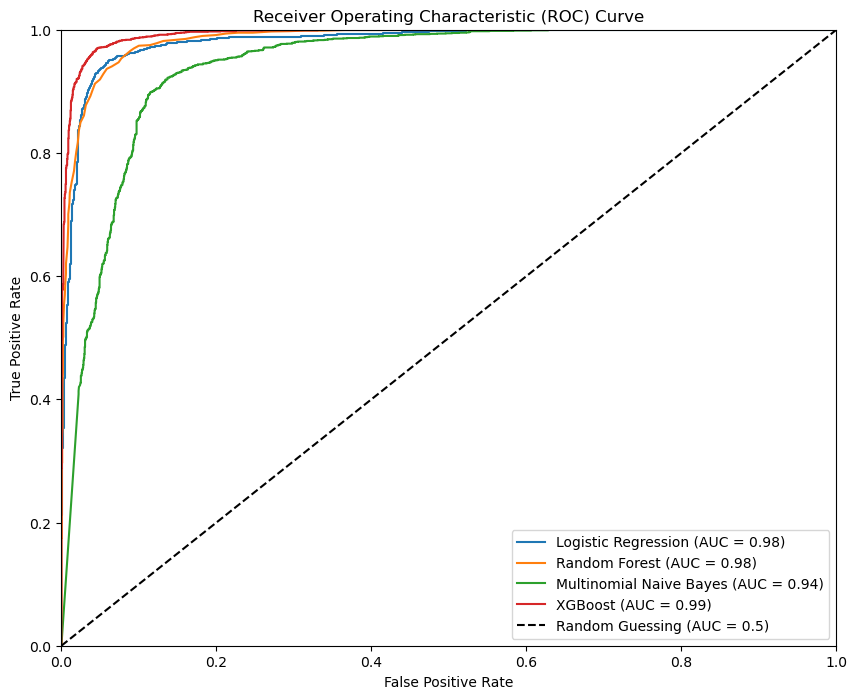

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

# Assuming 'data' is your cleaned DataFrame and 'text' and 'label' are your features
# Feature Extraction using Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)
X = count_vectorizer.fit_transform(data['text']).toarray()
y = data['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Multinomial Naive Bayes": MultinomialNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store ROC curve data
roc_data = {}

# Train models and calculate ROC
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Define a function to preprocess input text and make predictions
def predict_news(models, input_text):
    # Preprocess the input text
    input_vector = count_vectorizer.transform([input_text]).toarray()  # Vectorize the input text
    
    predictions = {}
    
    # Predict using each model
    for name, model in models.items():
        pred = model.predict(input_vector)[0]  # Predict class
        predictions[name] = 'Real News' if pred == 1 else 'Fake News'  # Assuming label 1 = Real News, 0 = Fake News

    return predictions

# Example input text
input_text = "The government announced new measures to tackle climate change, aiming to reduce emissions significantly."

# Get predictions
predictions = predict_news(models, input_text)

# Display predictions
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")

Logistic Regression: Fake News
Random Forest: Fake News
Multinomial Naive Bayes: Real News
XGBoost: Fake News


In [ ]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)
X = count_vectorizer.fit_transform(data['text']).toarray()
y = data['label']

# Save the CountVectorizer to a file
joblib.dump(count_vectorizer, 'count_vectorizer.joblib')

# Save models as before
for name, model in models.items():
    joblib.dump(model, f'{name.replace(" ", "_").lower()}_model.joblib')


In [ ]:
import pickle

# Load CountVectorizer
with open('count_vectorizer.pkl', 'rb') as file:
    count_vectorizer = pickle.load(file)

# Load each model
with open('logistic_regression_model.pkl', 'rb') as file:
    logistic_regression_model = pickle.load(file)

with open('random_forest_model.pkl', 'rb') as file:
    random_forest_model = pickle.load(file)

with open('multinomial_nb_model.pkl', 'rb') as file:
    multinomial_nb_model = pickle.load(file)

with open('xgb_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

# Dictionary to hold loaded models
loaded_models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Multinomial Naive Bayes": multinomial_nb_model,
    "XGBoost": xgb_model
}

# Function to make predictions with loaded models
def predict_news(loaded_models, count_vectorizer, input_text):
    # Transform the input text using the CountVectorizer
    input_vector = count_vectorizer.transform([input_text]).toarray()
    
    predictions = {}
    
    # Predict using each loaded model
    for name, model in loaded_models.items():
        pred = model.predict(input_vector)[0]
        predictions[name] = 'Real News' if pred == 1 else 'Fake News'
    
    return predictions

# Example input text
input_text = "The government announced new measures to tackle climate change, aiming to reduce emissions significantly."

# Get predictions
predictions = predict_news(loaded_models, count_vectorizer, input_text)

# Display predictions
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")


Logistic Regression: Fake News
Random Forest: Fake News
Multinomial Naive Bayes: Real News
XGBoost: Fake News


In [96]:
from collections import Counter

# Function to get majority vote from model predictions
def majority_vote(predictions):
    vote_count = Counter(predictions.values())
    final_prediction = vote_count.most_common(1)[0][0]
    return final_prediction

# Get individual model predictions
predictions = predict_news(loaded_models, count_vectorizer, input_text)

# Display individual model predictions
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")

# Get the final prediction using majority vote
final_prediction = majority_vote(predictions)
print(f"\nFinal Prediction (Majority Voting): {final_prediction}")


Logistic Regression: Fake News
Random Forest: Fake News
Multinomial Naive Bayes: Real News
XGBoost: Fake News

Final Prediction (Majority Voting): Fake News
